### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

In [ ]:
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [ ]:
ingresos_por_tienda = df_total.groupby("Tienda")["Precio"].sum().reset_index()
ingresos_por_tienda.columns = ["Tienda", "Ingresos Totales"]

In [ ]:
print("Tiendas únicas (por nombre genérico):", df_total["Tienda"].unique())
print("Cantidad de tiendas distintas:", df_total["Tienda"].nunique())

print("\nUbicaciones distintas (Lugar de Compra):", df_total["Lugar de Compra"].unique())
print("Cantidad de ubicaciones distintas:", df_total["Lugar de Compra"].nunique())



Tiendas únicas (por nombre genérico): ['Tienda 1' 'Tienda 2' 'Tienda 3' 'Tienda 4']
Cantidad de tiendas distintas: 4

Ubicaciones distintas (Lugar de Compra): ['Bogotá' 'Medellín' 'Cartagena' 'Cali' 'Santa Marta' 'Pereira'
 'Barranquilla' 'Villavicencio' 'Inírida' 'Cúcuta' 'Manizales' 'Neiva'
 'Bucaramanga' 'Valledupar' 'Pasto' 'Riohacha' 'Armenia' 'Leticia'
 'Soacha']
Cantidad de ubicaciones distintas: 19


In [ ]:
ingresos_por_tienda

,Tienda,Ingresos Totales
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


### Comprobación

In [ ]:
# Por ejemplo para Tienda 1
total_precio = df_total[df_total["Tienda"] == "Tienda 4"]["Precio"].sum()
print(total_precio)


1038375700.0


### Visualización

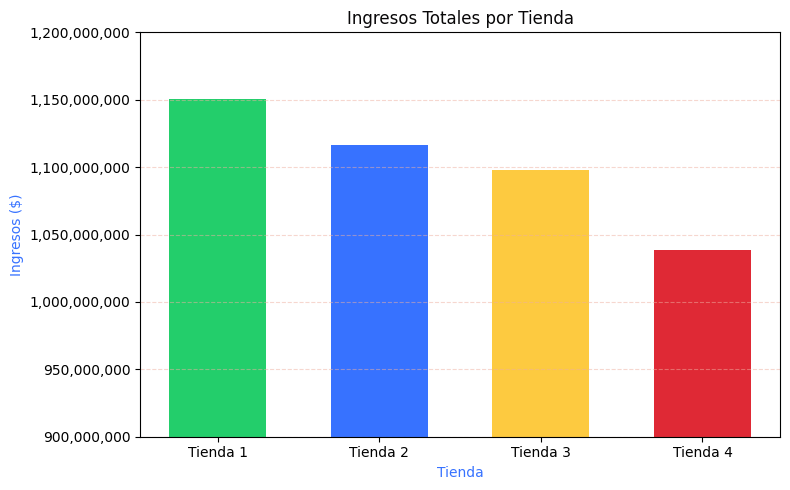

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Nueva paleta de colores
colores_paleta = ["#080708","#23CE6B", "#3772ff", "#fdca40", "#df2935", "#EFB0A1"]

# Crear la figura
plt.figure(figsize=(8, 5))

# Asignar un color distinto a cada barra
colores_barras = [colores_paleta[1], colores_paleta[2], colores_paleta[3], colores_paleta[4]]

# Crear el gráfico de barras con colores diferentes
plt.bar(ingresos_por_tienda["Tienda"], ingresos_por_tienda["Ingresos Totales"], color=colores_barras, width=0.6)

# Cambiar color del título y etiquetas
plt.title("Ingresos Totales por Tienda", color=colores_paleta[0])
plt.xlabel("Tienda", color=colores_paleta[2])
plt.ylabel("Ingresos ($)", color=colores_paleta[2])

# Limitar el rango del eje Y
plt.ylim(900_000_000, 1_200_000_000)  # Enfocar el rango relevante

# Personalizar el grid
plt.grid(axis="y", linestyle="--", alpha=0.5, color=colores_paleta[5])

# Mostrar etiquetas con separador de miles
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajustar para no cortar elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


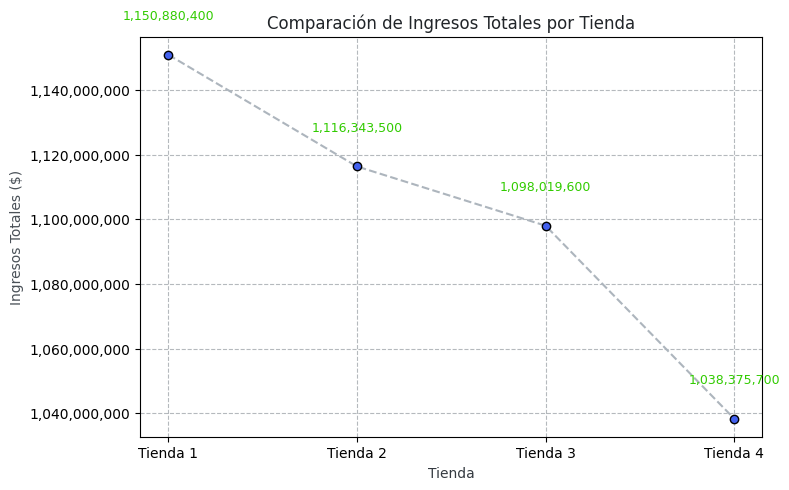

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Nueva paleta de colores
colores_paleta = ["#f8f9fa","#e9ecef","#dee2e6","#ced4da","#adb5bd","#6c757d","#495057","#343a40","#212529","#4361ee","#31cb00"]

# Ordenar por tienda para mantener coherencia visual
ingresos_linea = ingresos_por_tienda.sort_values("Tienda")

# Crear la figura
plt.figure(figsize=(8, 5))

# Cambiar color de la línea
plt.plot(ingresos_linea["Tienda"], ingresos_linea["Ingresos Totales"],
         marker='o', linestyle='--', color=colores_paleta[4], linewidth=1.5,
         markerfacecolor=colores_paleta[9], markeredgecolor='black')

# Cambiar color del título y etiquetas
plt.title("Comparación de Ingresos Totales por Tienda", color=colores_paleta[8])
plt.xlabel("Tienda", color=colores_paleta[7])
plt.ylabel("Ingresos Totales ($)", color=colores_paleta[6])

# Personalizar el grid
plt.grid(True, linestyle="--", alpha=0.5, color=colores_paleta[5])

# Etiquetas de miles
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Cambiar el fondo del gráfico
#plt.gca().set_facecolor(colores_paleta[0])

# Mostrar valores sobre los puntos con un color de la paleta
for i, row in ingresos_linea.iterrows():
    plt.text(row["Tienda"], row["Ingresos Totales"] + 10_000_000,
             f'{int(row["Ingresos Totales"]):,}', ha='center', va='bottom',
             fontsize=9, color=colores_paleta[10])

# Ajustar para no cortar elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 2. Ventas por categoría

In [ ]:
df_total.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')

In [ ]:
ventas_por_categoria = df_total.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad Vendida")
ventas_por_categoria


,Tienda,Categoría del Producto,Cantidad Vendida
0,Tienda 1,Artículos para el hogar,171
1,Tienda 1,Deportes y diversión,284
2,Tienda 1,Electrodomésticos,312
3,Tienda 1,Electrónicos,448
4,Tienda 1,Instrumentos musicales,182
5,Tienda 1,Juguetes,324
6,Tienda 1,Libros,173
7,Tienda 1,Muebles,465
8,Tienda 2,Artículos para el hogar,181
9,Tienda 2,Deportes y diversión,275


In [ ]:
mas_vendidas_tienda = ventas_por_categoria.sort_values("Cantidad Vendida", ascending=False).groupby("Tienda").first().reset_index()
mas_vendidas_tienda

,Tienda,Categoría del Producto,Cantidad Vendida
0,Tienda 1,Muebles,465
1,Tienda 2,Muebles,442
2,Tienda 3,Muebles,499
3,Tienda 4,Muebles,480


### Comprobación

In [ ]:
categoria = "Muebles"
tienda = "Tienda 4"

ventas = df_total[(df_total["Tienda"] == tienda) & (df_total["Categoría del Producto"] == categoria)].shape[0]
print(ventas)


480


### Visualización

In [ ]:
# Agrupar datos por tienda y categoría

agrupado = df_total.groupby(["Categoría del Producto", "Tienda"]).size().reset_index(name="Cantidad Vendida")

In [ ]:
# Pivot para tener categorías como índice y tiendas como columnas
pivot = agrupado.pivot(index="Categoría del Producto", columns="Tienda", values="Cantidad Vendida").fillna(0)
pivot


Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


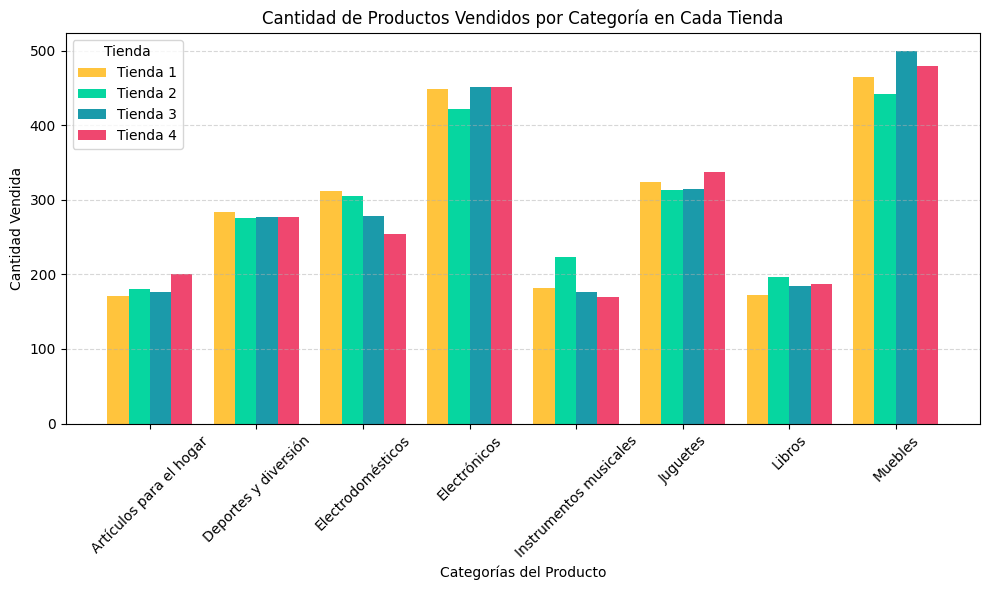

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Paleta de colores
colores_paleta = ["#ffc43d","#06d6a0","#1b9aaa","#ef476f","#f8ffe5"]

# Tamaño del gráfico
plt.figure(figsize=(10, 6))

# Lista de categorías (esto lo tienes de tu DataFrame)
categorias = pivot.index
# Número de categorías
n = len(categorias)
# Ancho de las barras
bar_width = 0.2

# Posiciones de las barras en el eje X
posiciones = np.arange(n)

# Lista de tiendas
tiendas = pivot.columns

# Barras para cada tienda
for i, tienda in enumerate(tiendas):
    # Usamos la paleta para asignar colores diferentes a cada tienda
    color = colores_paleta[i % len(colores_paleta)]  # Usa el color correspondiente según el índice de la tienda
    plt.bar(posiciones + i * bar_width, pivot[tienda], width=bar_width, label=tienda, color=color)

# Etiquetas en el eje X y otras configuraciones
plt.xticks(posiciones + bar_width * (len(tiendas) - 1) / 2, categorias, rotation=45)
plt.xlabel("Categorías del Producto")
plt.ylabel("Cantidad Vendida")
plt.title("Cantidad de Productos Vendidos por Categoría en Cada Tienda")
plt.legend(title="Tienda")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


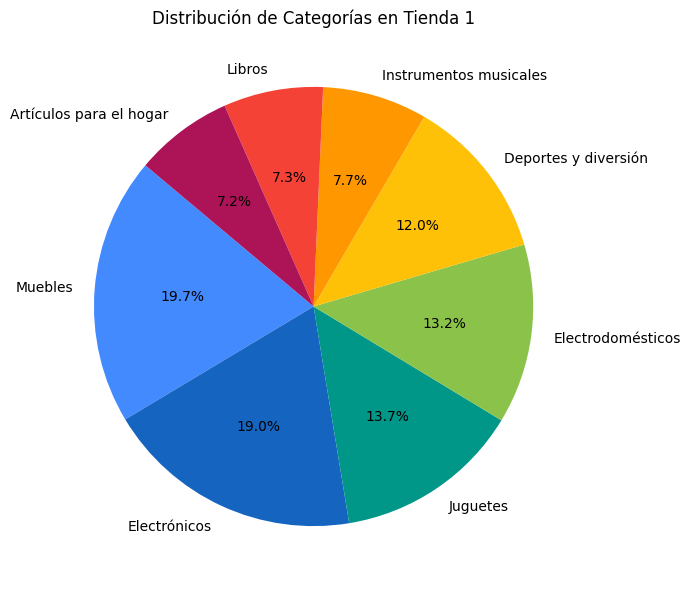

In [ ]:
import matplotlib.pyplot as plt

# Definir la paleta de colores
colores_paleta = ["#448aff", "#1565c0", "#009688", "#8bc34a", "#ffc107", "#ff9800", "#f44336", "#ad1457"]

# Filtrar los datos para Tienda 1 (asegúrate de que df_total esté definido)
tienda1_cat = df_total[df_total["Tienda"] == "Tienda 1"]["Categoría del Producto"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(7, 7))
plt.pie(tienda1_cat, labels=tienda1_cat.index, autopct="%1.1f%%", startangle=140, colors=colores_paleta)

# Título
plt.title("Distribución de Categorías en Tienda 1")

# Mejorar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


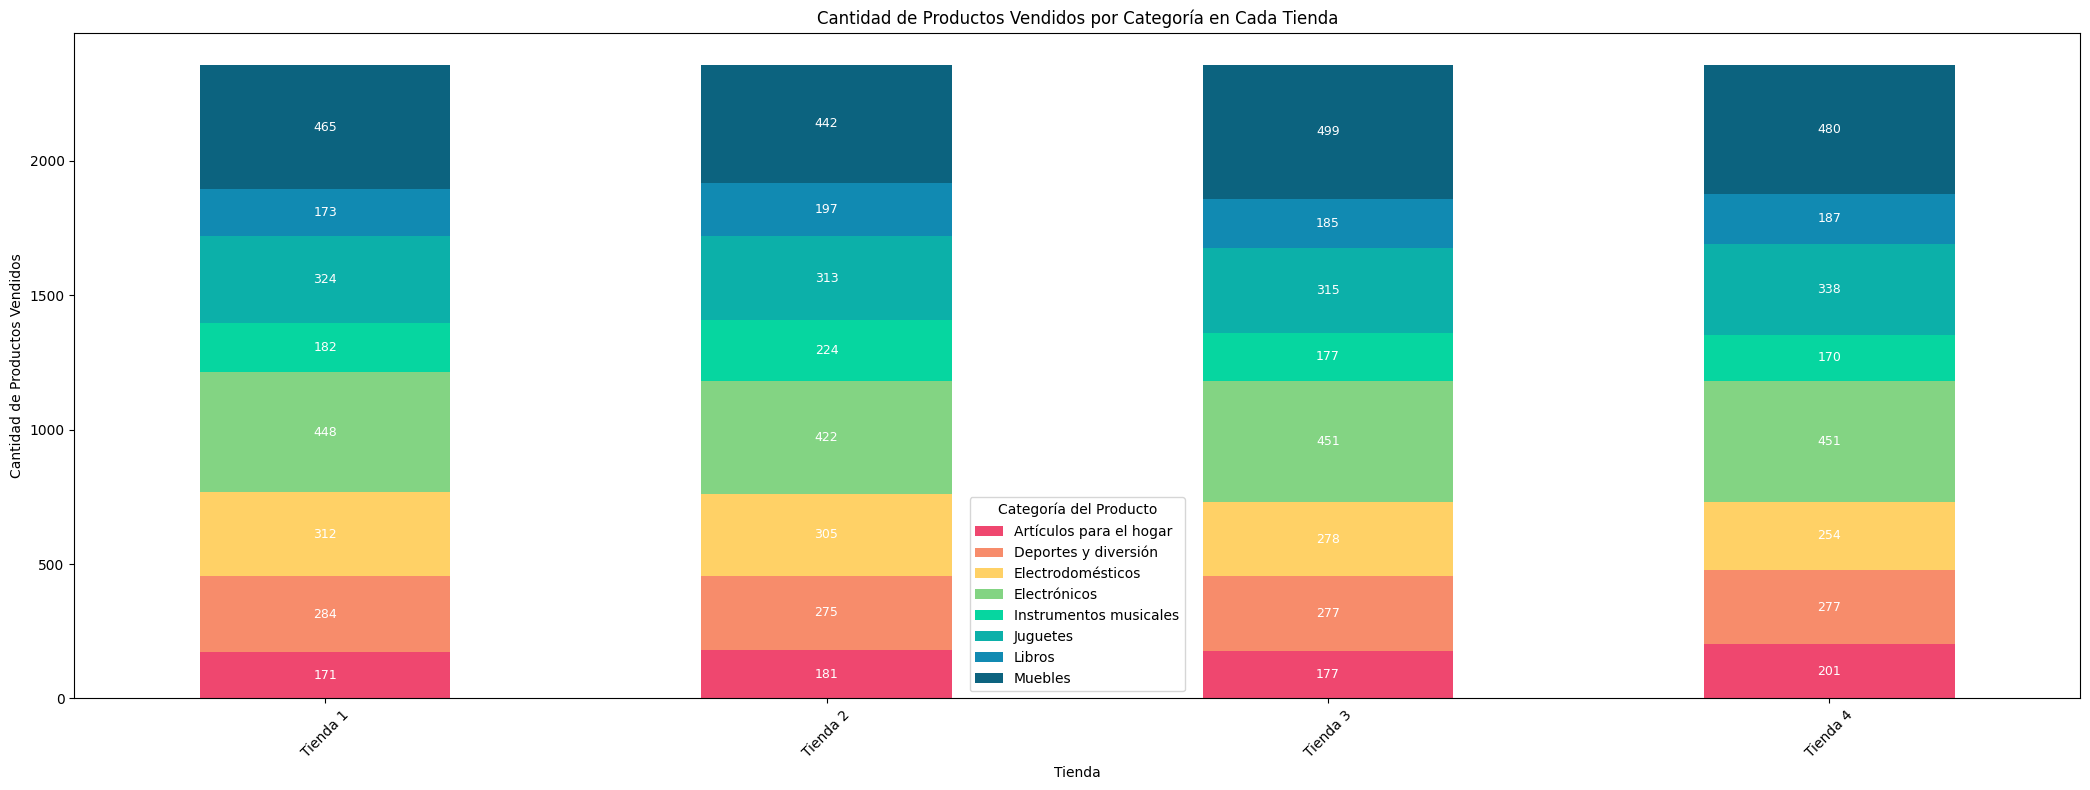

In [ ]:
import matplotlib.pyplot as plt

# Paleta de colores personalizada
colores_paleta = ["#ef476f","#f78c6b","#ffd166","#83d483","#06d6a0","#0cb0a9","#118ab2","#0c637f","#073b4c"]

# Calcular la cantidad de productos vendidos por categoría por tienda
ventas_por_categoria = df_total.groupby(['Tienda', 'Categoría del Producto'])['Producto'].count().unstack().fillna(0)

# Crear gráfico de barras apiladas con la paleta personalizada
ax = ventas_por_categoria.plot(kind='bar', stacked=True, figsize=(21, 8), color=colores_paleta[:len(ventas_por_categoria.columns)])

# Títulos y etiquetas
plt.title("Cantidad de Productos Vendidos por Categoría en Cada Tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de Productos Vendidos")
plt.xticks(rotation=45)

# Etiquetas en las barras
for i, tienda in enumerate(ventas_por_categoria.index):
    # Variable para mantener la altura acumulada
    height = 0
    for j, categoria in enumerate(ventas_por_categoria.columns):
        # Obtener la altura de cada segmento
        valor = ventas_por_categoria.loc[tienda, categoria]
        height += valor
        # Colocar la etiqueta sobre la barra
        if valor > 0:  # Solo colocar etiquetas si hay valor
            ax.text(i, height - valor / 2, str(int(valor)), ha='center', va='center', fontsize=9, color='white')


# Ajustar el layout para que no se corten los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
df_total["Calificación"].describe()


,Calificación
count,9435.000000
mean,4.014520
std,1.390518
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
calificaciones_promedio = df_total.groupby("Tienda")["Calificación"].mean().reset_index()
calificaciones_promedio.columns = ["Tienda", "Calificación Promedio"]
calificaciones_promedio



,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


In [ ]:
calificaciones_promedio.sort_values("Calificación Promedio", ascending=False)


,Tienda,Calificación Promedio
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


Tiendas con calificaciones más cercanas a 5 están generando mayor satisfacción del cliente.

### Comprobación

In [ ]:
promedio_manual = df_total[df_total["Tienda"] == "Tienda 1"]["Calificación"].mean()
print(promedio_manual)


3.976685036032217


### Visualización

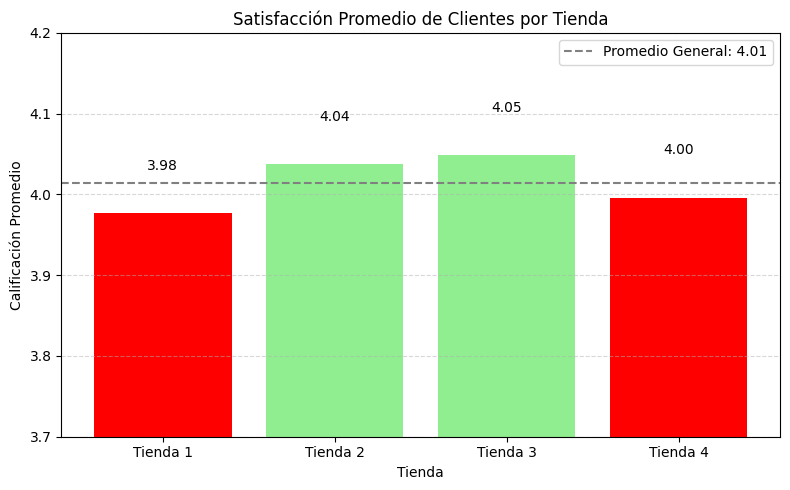

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(calificaciones_promedio["Tienda"], calificaciones_promedio["Calificación Promedio"], color="mediumseagreen")

plt.title("Satisfacción Promedio de Clientes por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.ylim(3.7, 4.2) # Escala de calificaciones de 0 a 5
plt.grid(axis="y", linestyle="--", alpha=0.5)
colors = ['red' if val < 4 else 'lightgreen' for val in calificaciones_promedio["Calificación Promedio"]]
plt.bar(calificaciones_promedio["Tienda"], calificaciones_promedio["Calificación Promedio"], color=colors)
promedio_global = df_total["Calificación"].mean()
plt.axhline(promedio_global, color='gray', linestyle='--', label=f'Promedio General: {promedio_global:.2f}')
plt.legend()

# Etiquetas sobre las barras
for i, valor in enumerate(calificaciones_promedio["Calificación Promedio"]):
  plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

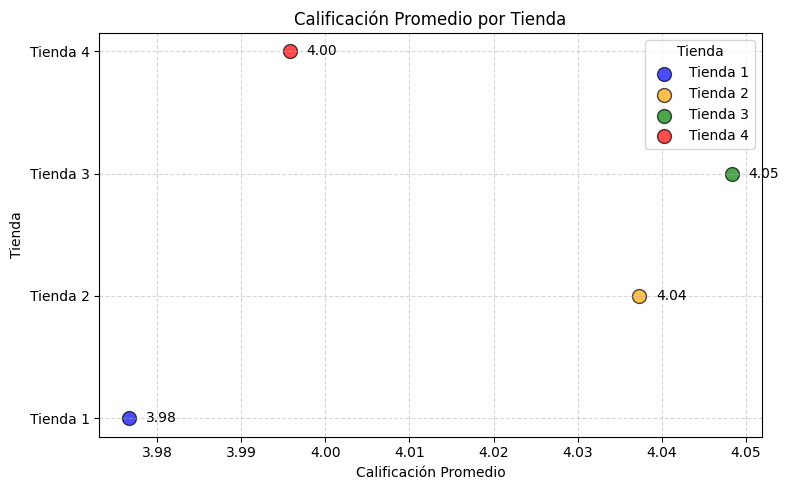

In [ ]:
import matplotlib.pyplot as plt

# Ordenar las calificaciones por tienda
calif_orden = calificaciones_promedio.sort_values("Tienda")

# Crear el gráfico
plt.figure(figsize=(8, 5))

# Colores personalizados para cada tienda
colores = ['blue', 'orange', 'green', 'red']

# Graficar los puntos para cada tienda
for i, tienda in enumerate(calif_orden["Tienda"].unique()):
    tienda_data = calif_orden[calif_orden["Tienda"] == tienda]
    plt.scatter(tienda_data["Calificación Promedio"], [tienda] * len(tienda_data),
                color=colores[i], label=tienda, s=100, edgecolor='black', alpha=0.7)

# Títulos y etiquetas
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Calificación Promedio")
plt.ylabel("Tienda")

# Configuración de la cuadrícula
plt.grid(True, linestyle="--", alpha=0.5)

# Añadir leyenda
plt.legend(title="Tienda")

# Añadir etiquetas para las calificaciones con desplazamiento
for i, tienda in enumerate(calif_orden["Tienda"].unique()):
    tienda_data = calif_orden[calif_orden["Tienda"] == tienda]
    for j, valor in enumerate(tienda_data["Calificación Promedio"]):
        # Desplazar las etiquetas para evitar empalmes
        offset = 0.002  # Este valor puede ser ajustado para separar más o menos las etiquetas
        plt.text(valor + offset, tienda, f'{valor:.2f}', ha='left', va='center', fontsize=10, color='black')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 4. Productos más y menos vendidos



In [ ]:
producto_por_tienda = df_total.groupby(["Tienda", "Producto", "Categoría del Producto"]).size().reset_index(name="Cantidad Vendida")


In [ ]:
# Obtener el valor máximo de ventas por tienda
max_por_tienda = producto_por_tienda.groupby("Tienda")["Cantidad Vendida"].transform("max")

# Filtrar los productos que tienen ese valor máximo
mas_vendidos = producto_por_tienda[producto_por_tienda["Cantidad Vendida"] == max_por_tienda].copy()


# Menos vendidos por tienda
min_por_tienda = producto_por_tienda.groupby("Tienda")["Cantidad Vendida"].transform("min")
menos_vendidos = producto_por_tienda[producto_por_tienda["Cantidad Vendida"] == min_por_tienda].copy()


print("✅ Productos más vendidos por tienda:")
print(mas_vendidos)


print("\n🔻 Productos menos vendidos por tienda:")
print(menos_vendidos)

✅ Productos más vendidos por tienda:
       Tienda                   Producto Categoría del Producto  \
1    Tienda 1                    Armario                Muebles   
33   Tienda 1                 Microondas      Electrodomésticos   
48   Tienda 1              TV LED UHD 4K           Electrónicos   
75   Tienda 2  Iniciando en programación                 Libros   
129  Tienda 3              Kit de bancas                Muebles   
163  Tienda 4                   Cama box                Muebles   

     Cantidad Vendida  
1                  60  
33                 60  
48                 60  
75                 65  
129                57  
163                62  

🔻 Productos menos vendidos por tienda:
       Tienda                   Producto  Categoría del Producto  \
4    Tienda 1  Auriculares con micrófono            Electrónicos   
13   Tienda 1               Celular ABXY            Electrónicos   
77   Tienda 2              Juego de mesa                Juguetes   
111  Tienda 3

### Comprobación

In [ ]:
producto = "Armario"
tienda = "Tienda 1"

cantidad = df_total[(df_total["Tienda"] == tienda) & (df_total["Producto"] == producto)].shape[0]
print(cantidad)


60


# Visualización



📊 Top 10 productos más vendidos en Tienda 1:


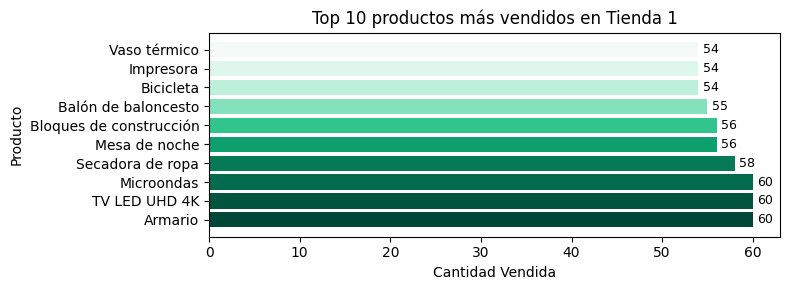


📉 Top 10 productos menos vendidos en Tienda 1:


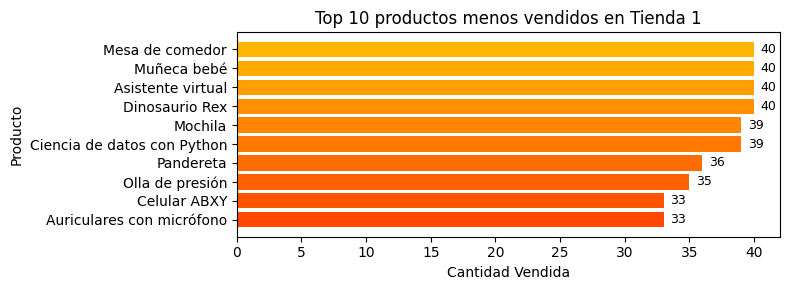


📊 Top 10 productos más vendidos en Tienda 2:


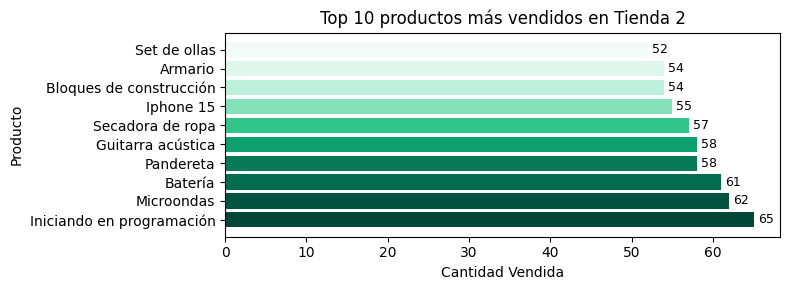


📉 Top 10 productos menos vendidos en Tienda 2:


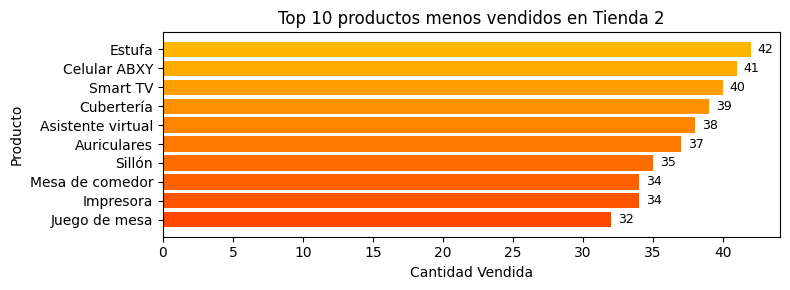


📊 Top 10 productos más vendidos en Tienda 3:


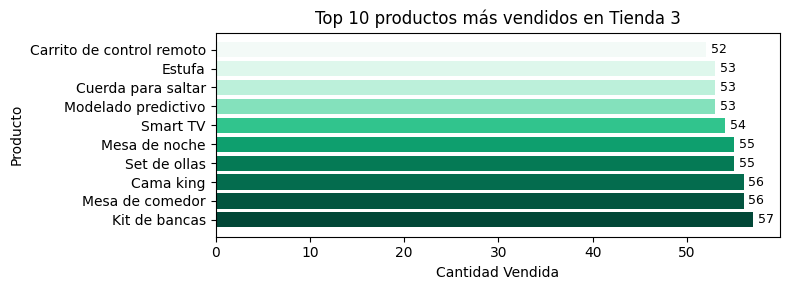


📉 Top 10 productos menos vendidos en Tienda 3:


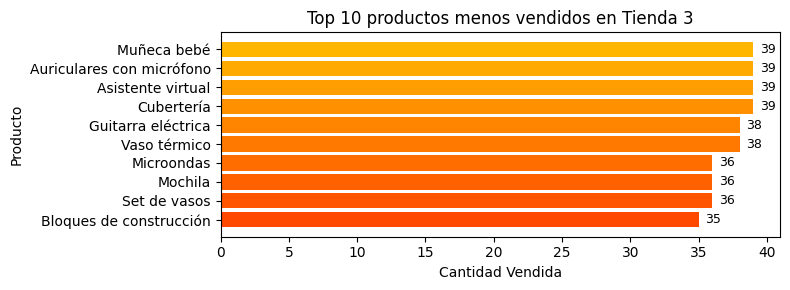


📊 Top 10 productos más vendidos en Tienda 4:


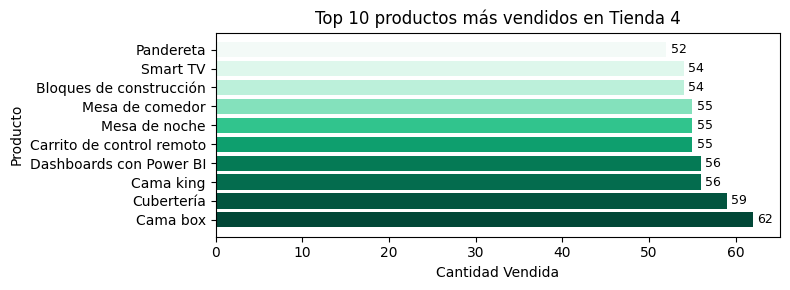


📉 Top 10 productos menos vendidos en Tienda 4:


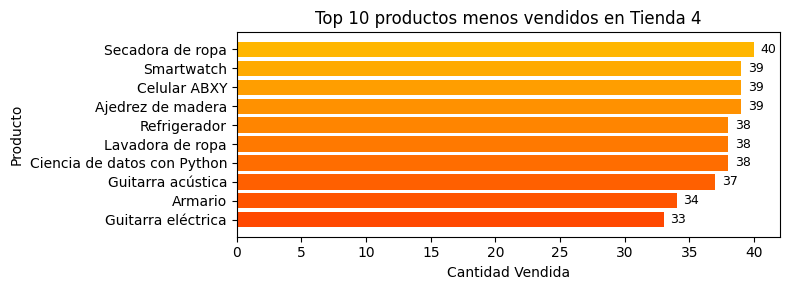

In [ ]:
import matplotlib.pyplot as plt

def prods_tienda(df, nombre_tienda, n=8, top=True, mostrar_valores=True):
    """
    Grafica los productos más o menos vendidos por tienda.

    Parámetros:
    - df: DataFrame que contiene las columnas 'Tienda', 'Producto' y 'Cantidad Vendida'
    - nombre_tienda: nombre exacto de la tienda
    - n: número de productos a mostrar (por defecto 8)
    - top: True para más vendidos, False para menos vendidos
    - mostrar_valores: muestra la cantidad al final de cada barra
    """
    # Filtrar por tienda y ordenar
    datos_tienda = df[df["Tienda"] == nombre_tienda].copy()
    datos_tienda = datos_tienda.sort_values("Cantidad Vendida", ascending=not top).head(n)

    tipo = "más" if top else "menos"

    # Crear gráfico
    plt.figure(figsize=(8, 3))

    # Paletas de colores para los productos más y menos vendidos
    colores_mas_vendidos = ["#014737","#03543f","#046c4e","#057a55","#0e9f6e","#31c48d","#84e1bc","#bcf0da","#def7ec","#f3faf7"]
    colores_menos_vendidos = ["#ff4800", "#ff5400", "#ff6000", "#ff6d00", "#ff7900", "#ff8500", "#ff9100", "#ff9e00", "#ffaa00", "#ffb600"]

    # Seleccionar la paleta correspondiente según 'top'
    colores = colores_mas_vendidos[:n] if top else colores_menos_vendidos[:n]

    # Crear gráfico de barras horizontales con los colores personalizados
    bars = plt.barh(datos_tienda["Producto"], datos_tienda["Cantidad Vendida"], color=colores)
    plt.title(f"Top {n} productos {tipo} vendidos en {nombre_tienda}")
    plt.xlabel("Cantidad Vendida")
    plt.ylabel("Producto")
    plt.tight_layout()

    # Agregar etiquetas al final de cada barra
    if mostrar_valores:
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.5,  # posición horizontal (ligeramente después de la barra)
                     bar.get_y() + bar.get_height() / 2,  # centro vertical
                     f'{int(width)}',  # el número
                     va='center', fontsize=9, color='black')

    plt.show()

# Calcular cantidad vendida por producto y tienda (si no está hecho)
producto_por_tienda = df_total.groupby(["Tienda", "Producto", "Categoría del Producto"]).size().reset_index(name="Cantidad Vendida")

# Listado de tiendas
tiendas = df_total["Tienda"].unique()

# Número de productos a mostrar
n = 10

# Generar gráficos para cada tienda
for tienda in tiendas:
    print(f"\n📊 Top {n} productos más vendidos en {tienda}:")
    prods_tienda(producto_por_tienda, tienda, n=n, top=True)

    print(f"\n📉 Top {n} productos menos vendidos en {tienda}:")
    prods_tienda(producto_por_tienda, tienda, n=n, top=False)


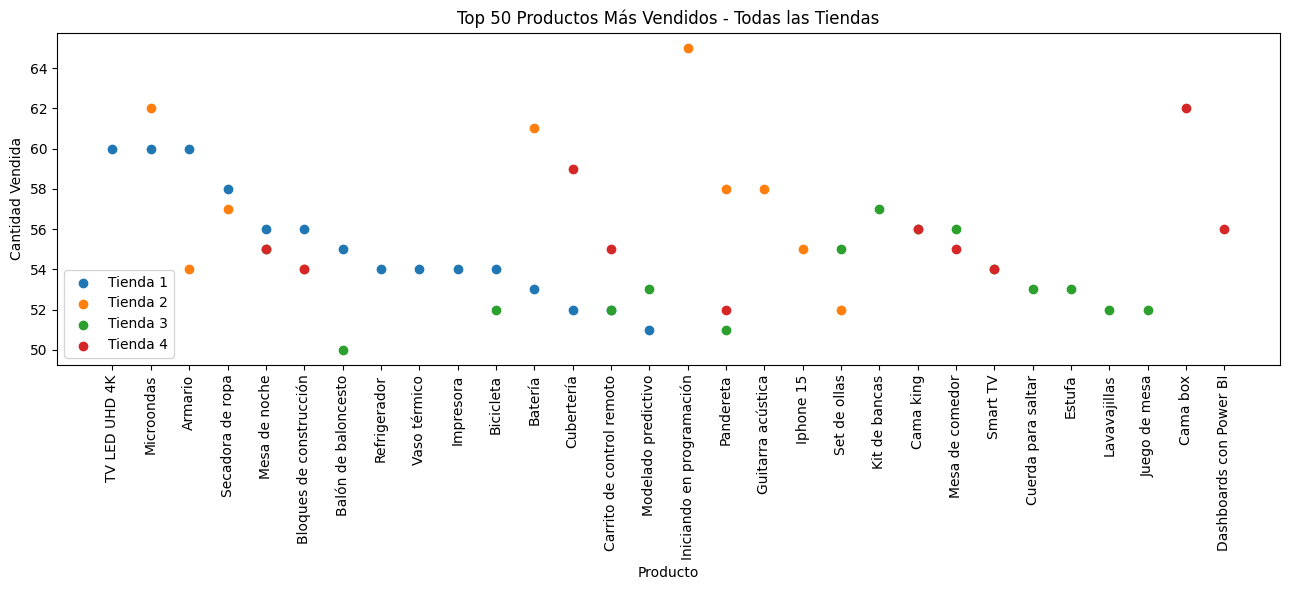

In [ ]:
# Scatter plot de productos más vendidos (top 50)
top_productos = producto_por_tienda.sort_values("Cantidad Vendida", ascending=False).head(50)

plt.figure(figsize=(13, 6))
for tienda in tiendas:
    subset = top_productos[top_productos["Tienda"] == tienda]
    plt.scatter(subset["Producto"], subset["Cantidad Vendida"], label=tienda)

plt.xticks(rotation=90)
plt.title("Top 50 Productos Más Vendidos - Todas las Tiendas")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.legend()
plt.tight_layout()
plt.show()


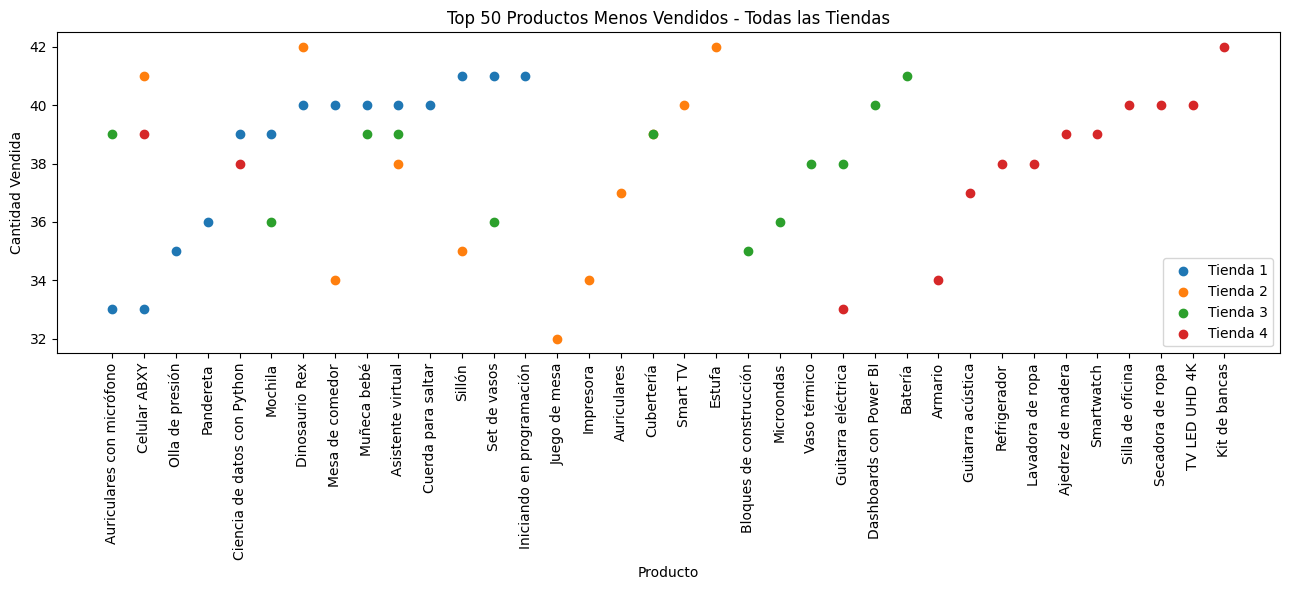

In [ ]:
# Scatter plot de productos más vendidos (top 50)
top_productos = producto_por_tienda.sort_values("Cantidad Vendida", ascending=True).head(50)

plt.figure(figsize=(13, 6))
for tienda in tiendas:
    subset = top_productos[top_productos["Tienda"] == tienda]
    plt.scatter(subset["Producto"], subset["Cantidad Vendida"], label=tienda)

plt.xticks(rotation=90)
plt.title("Top 50 Productos Menos Vendidos - Todas las Tiendas")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.legend()
plt.tight_layout()
plt.show()

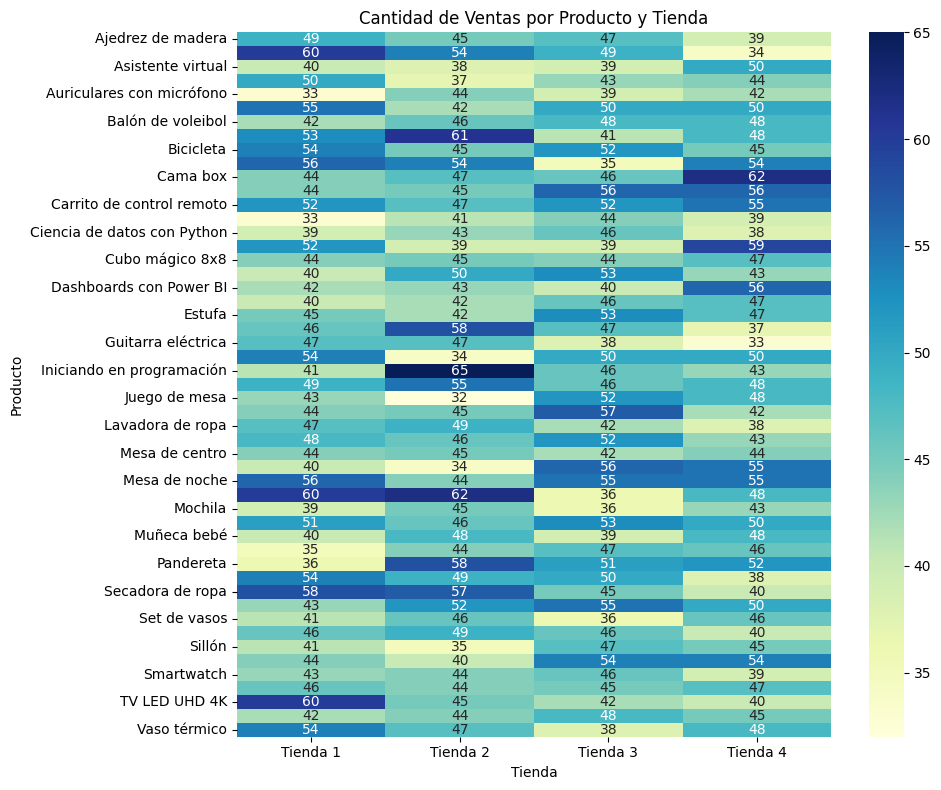

In [ ]:
import seaborn as sns  # Requiere instalación: pip install seaborn

# Crear tabla dinámica de ventas por producto y tienda
tabla = df_total.pivot_table(index="Producto", columns="Tienda", values="Precio", aggfunc="count").fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(tabla, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Cantidad de Ventas por Producto y Tienda")
plt.xlabel("Tienda")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

     Tienda  Costo de Envío Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


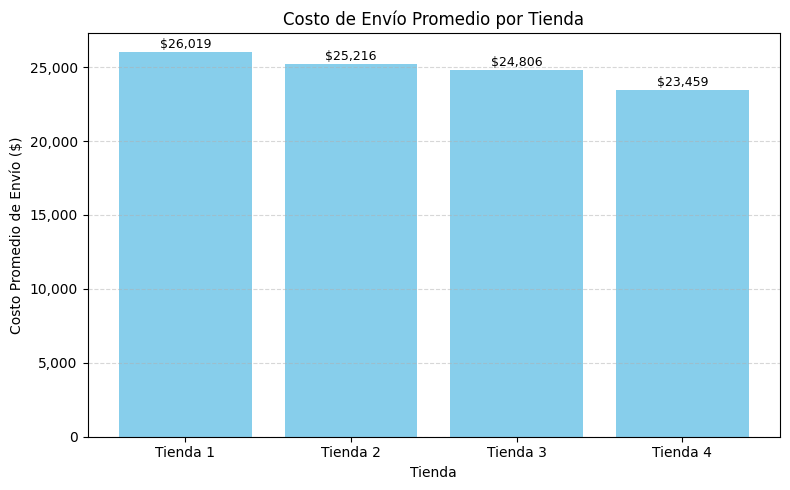

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. Agrupar por tienda y calcular el costo promedio de envío
costo_envio_promedio = df_total.groupby("Tienda")["Costo de envío"].mean().reset_index()
costo_envio_promedio.columns = ["Tienda", "Costo de Envío Promedio"]

# Mostrar la tabla de resultados
print(costo_envio_promedio)

# 2. Graficar los costos promedio de envío
plt.figure(figsize=(8, 5))
plt.bar(costo_envio_promedio["Tienda"], costo_envio_promedio["Costo de Envío Promedio"], color="skyblue")

plt.title("Costo de Envío Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio de Envío ($)")

# Formatear el eje Y con separadores de miles
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(axis="y", linestyle="--", alpha=0.5)

# Agregar etiquetas sobre las barras
for i, valor in enumerate(costo_envio_promedio["Costo de Envío Promedio"]):
    plt.text(i, valor + 50, f"${valor:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Visualización

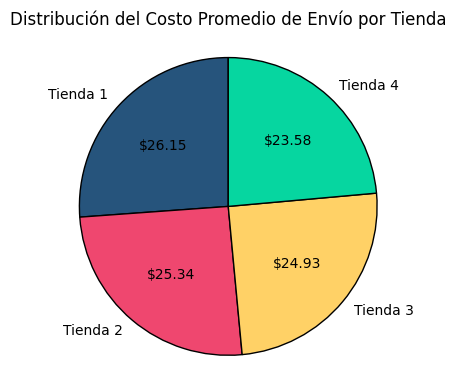

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por tienda y calcular el costo promedio de envío
costo_envio_promedio = df_total.groupby("Tienda")["Costo de envío"].mean().reset_index()
costo_envio_promedio.columns = ["Tienda", "Costo de Envío Promedio"]

# 2. Graficar un gráfico de torta para el costo de envío promedio por tienda
plt.figure(figsize=(4, 4))

# Definir la paleta de colores personalizada
colores_personalizados = ["#26547c", "#ef476f", "#ffd166", "#06d6a0"]

plt.pie(costo_envio_promedio["Costo de Envío Promedio"],
        labels=costo_envio_promedio["Tienda"],
        autopct=lambda x: f"${x:,.2f}",  # Mostrar el valor en dólares con separadores de miles
        colors=colores_personalizados,  # Usar la paleta personalizada
        startangle=90,  # Iniciar el gráfico en 90 grados
        wedgeprops={'edgecolor': 'black'})  # Borde de las porciones

plt.title("Distribución del Costo Promedio de Envío por Tienda")
plt.axis('equal')  # Asegura que el gráfico sea circular

plt.tight_layout()
plt.show()



### Comrpobación

In [ ]:
tienda1 = df_total[df_total["Tienda"] == "Tienda 4"]

suma = tienda1["Costo de envío"].sum()
cantidad = tienda1["Costo de envío"].count()

promedio = suma / cantidad
print(f"Suma: {suma}, Cantidad: {cantidad}, Promedio: {promedio}")


Suma: 55317400.0, Cantidad: 2358, Promedio: 23459.457167090754


# 6. Extra. Análisis del desempeño geográfico

In [ ]:
import folium
from folium.plugins import HeatMap

# Crear un mapa base centrado en el promedio de las latitudes y longitudes
m = folium.Map(location=[df_total['lat'].mean(), df_total['lon'].mean()], zoom_start=6)

# Preparar los datos para el mapa de calor
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_total.iterrows()]

# Agregar el mapa de calor
HeatMap(heat_data).add_to(m)

# Mostrar el mapa interactivo
m


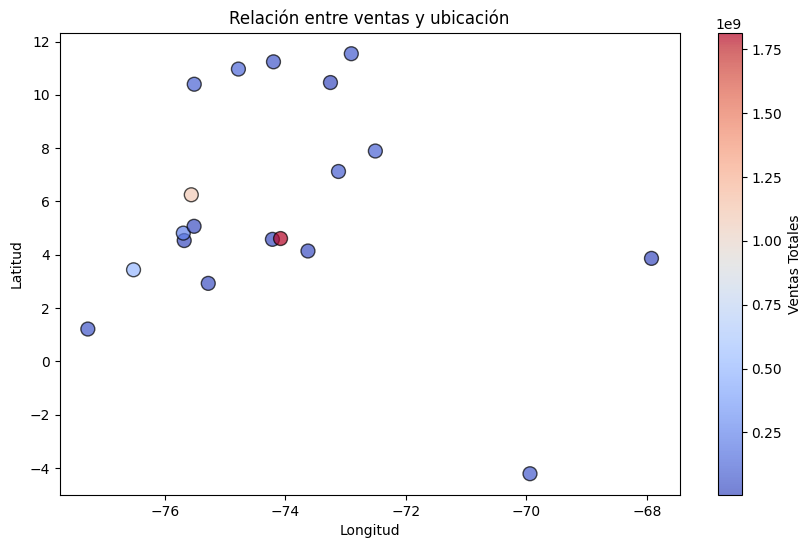

In [ ]:
# Agrupar por latitud y longitud, y calcular la suma de ventas y la media de las calificaciones
df_agg = df_total.groupby(['lat', 'lon']).agg({'Precio': 'sum', 'Calificación': 'mean'}).reset_index()

# Crear un gráfico de dispersión para ver la relación entre las ventas y las calificaciones en función de la ubicación
plt.figure(figsize=(10, 6))
plt.scatter(df_agg['lon'], df_agg['lat'], c=df_agg['Precio'], cmap='coolwarm', alpha=0.7, edgecolors='k', s=100)
plt.colorbar(label='Ventas Totales')
plt.title('Relación entre ventas y ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [ ]:
# Agrupar por Tienda y Lugar de Compra para calcular la suma de ventas y la media de las calificaciones
df_ventas_ubicacion = df_total.groupby(['Tienda', 'Lugar de Compra']).agg({'Precio': 'sum', 'Calificación': 'mean'}).reset_index()

# Mostrar el rendimiento por tienda y ubicación
df_ventas_ubicacion



,Tienda,Lugar de Compra,Precio,Calificación
0,Tienda 1,Armenia,4615700.0,3.357143
1,Tienda 1,Barranquilla,32907700.0,3.573333
2,Tienda 1,Bogotá,440005000.0,4.089431
3,Tienda 1,Bucaramanga,17579200.0,4.387097
4,Tienda 1,Cali,154493700.0,3.985866
...,...,...,...,...
71,Tienda 4,Riohacha,23684700.0,4.113636
72,Tienda 4,Santa Marta,13218600.0,3.542857
73,Tienda 4,Soacha,3149000.0,4.500000
74,Tienda 4,Valledupar,1057000.0,5.000000


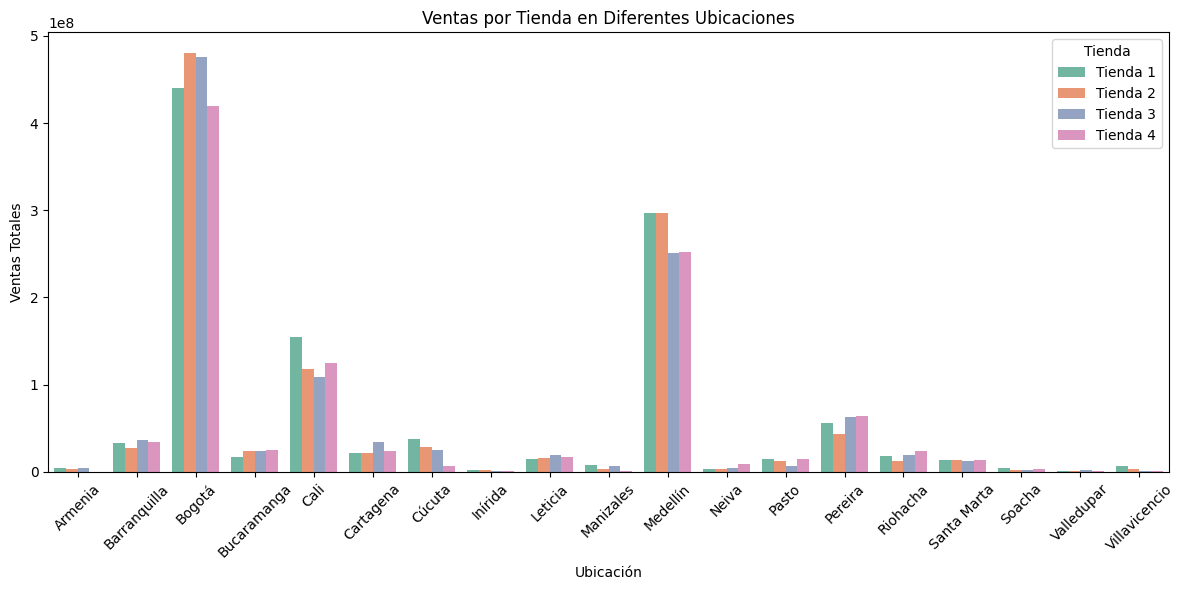

In [ ]:
import seaborn as sns

# Crear un gráfico de barras para mostrar las ventas por Tienda y Lugar de Compra
plt.figure(figsize=(12, 6))
sns.barplot(x='Lugar de Compra', y='Precio', hue='Tienda', data=df_ventas_ubicacion, palette='Set2')

plt.title('Ventas por Tienda en Diferentes Ubicaciones')
plt.xlabel('Ubicación')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Informe de Análisis y Recomendación para Alura Store

### **Introducción**

El presente informe tiene como objetivo analizar el rendimiento integral de las cuatro sucursales de la cadena Alura Store. A través de la evaluación de métricas clave como ingresos totales, ventas por categoría, calificaciones de clientes, rendimiento de productos y costos de envío, se busca identificar la tienda con el desempeño menos eficiente. El análisis culminará en una recomendación estratégica para el Sr. Juan sobre qué sucursal vender para liberar capital y así poder iniciar su nuevo emprendimiento.



### **Desarrollo del Análisis de Datos**

A continuación, se presenta el análisis de los datos extraídos de los archivos CSV, procesados con la biblioteca Pandas y visualizados con Matplotlib.


#### **1. Ingresos Totales por Tienda**

Los ingresos son el indicador más directo del rendimiento financiero de cada sucursal. La **Tienda 1** lidera con los ingresos más altos, mientras que la **Tienda 4** se posiciona en el último lugar con una diferencia considerable respecto a las demás.

- **Tienda 1:** $1,150,880,400
    
- **Tienda 2:** $1,116,343,500
    
- **Tienda 3:** $1,098,019,600
    
- **Tienda 4:** $1,038,375,700
    

**Gráfico - Ingresos Totales por Tienda:**

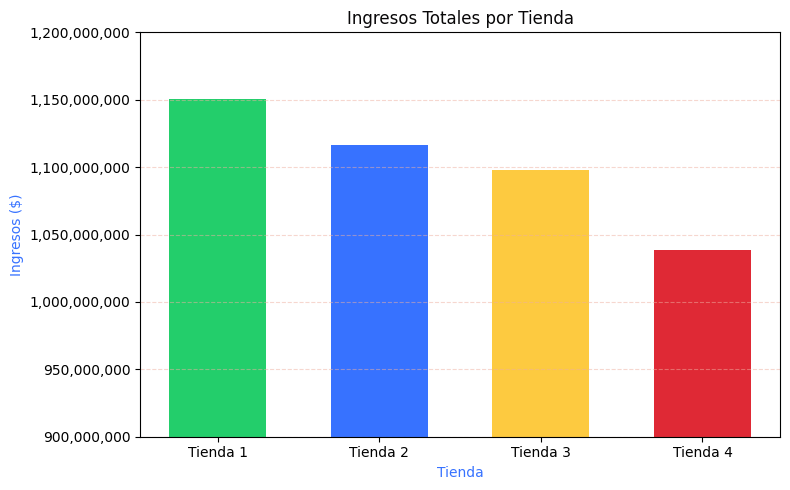

_Este gráfico visualiza de forma clara y comparativa la brecha de ingresos entre las tiendas, destacando el bajo rendimiento de la Tienda 4._

**Gráfico2 - Ingresos Totales por Tienda:**

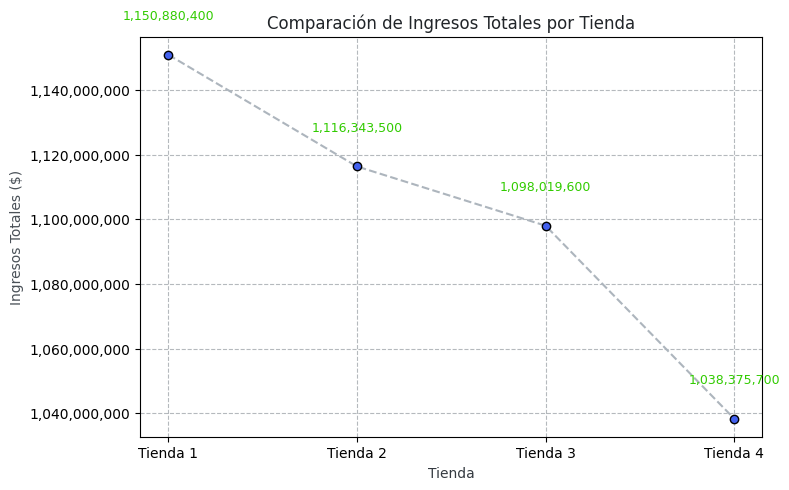

---


#### **2. Ventas por Categoría de Producto**
El análisis de las categorías de productos más vendidas revela las preferencias de los clientes en cada tienda. En todas las sucursales, **Muebles** y **Electrónicos** son las categorías más populares, lo que indica una demanda de esos productos.

- **Categoría más vendida en todas las tiendas:** Muebles.
    
- **Rendimiento por categoría:** La Tienda 4 muestra el rendimiento más bajo en la venta de **Electrodomésticos** (254 unidades) en comparación con las otras tiendas. Aunque vende más **Juguetes** y **Artículos para el hogar**, vender menos en una categoría de alto valor como electrodomésticos es un punto débil.  


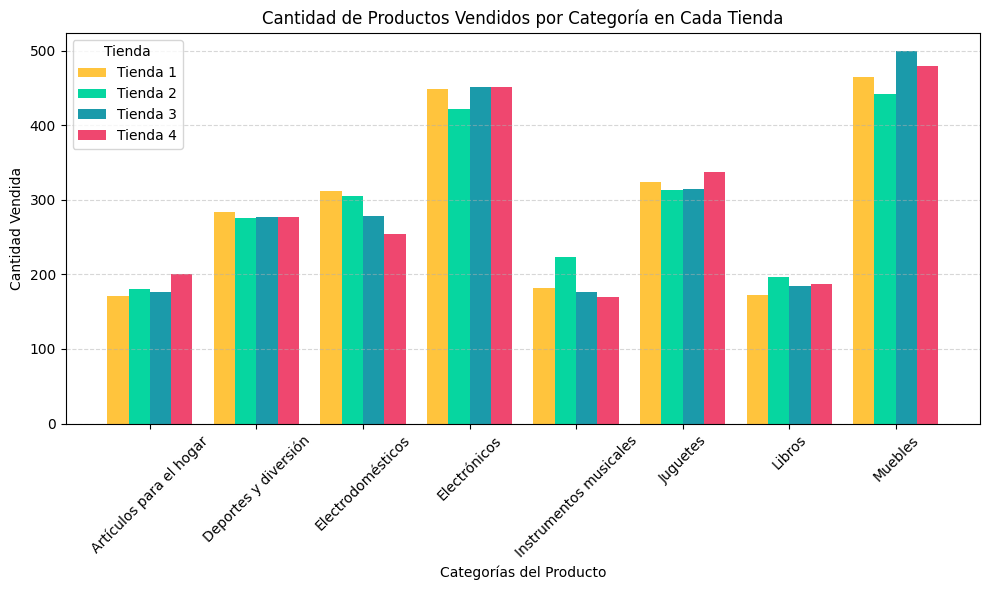


**Gráfico - Cantidad de Productos Vendidos por Categoría en Cada Tienda :** _El gráfico de barras agrupadas y el de barras apiladas  son excelentes opciones. Permiten comparar el volumen de ventas de cada categoría entre las cuatro tiendas, evidenciando las fortalezas y debilidades de cada una._  


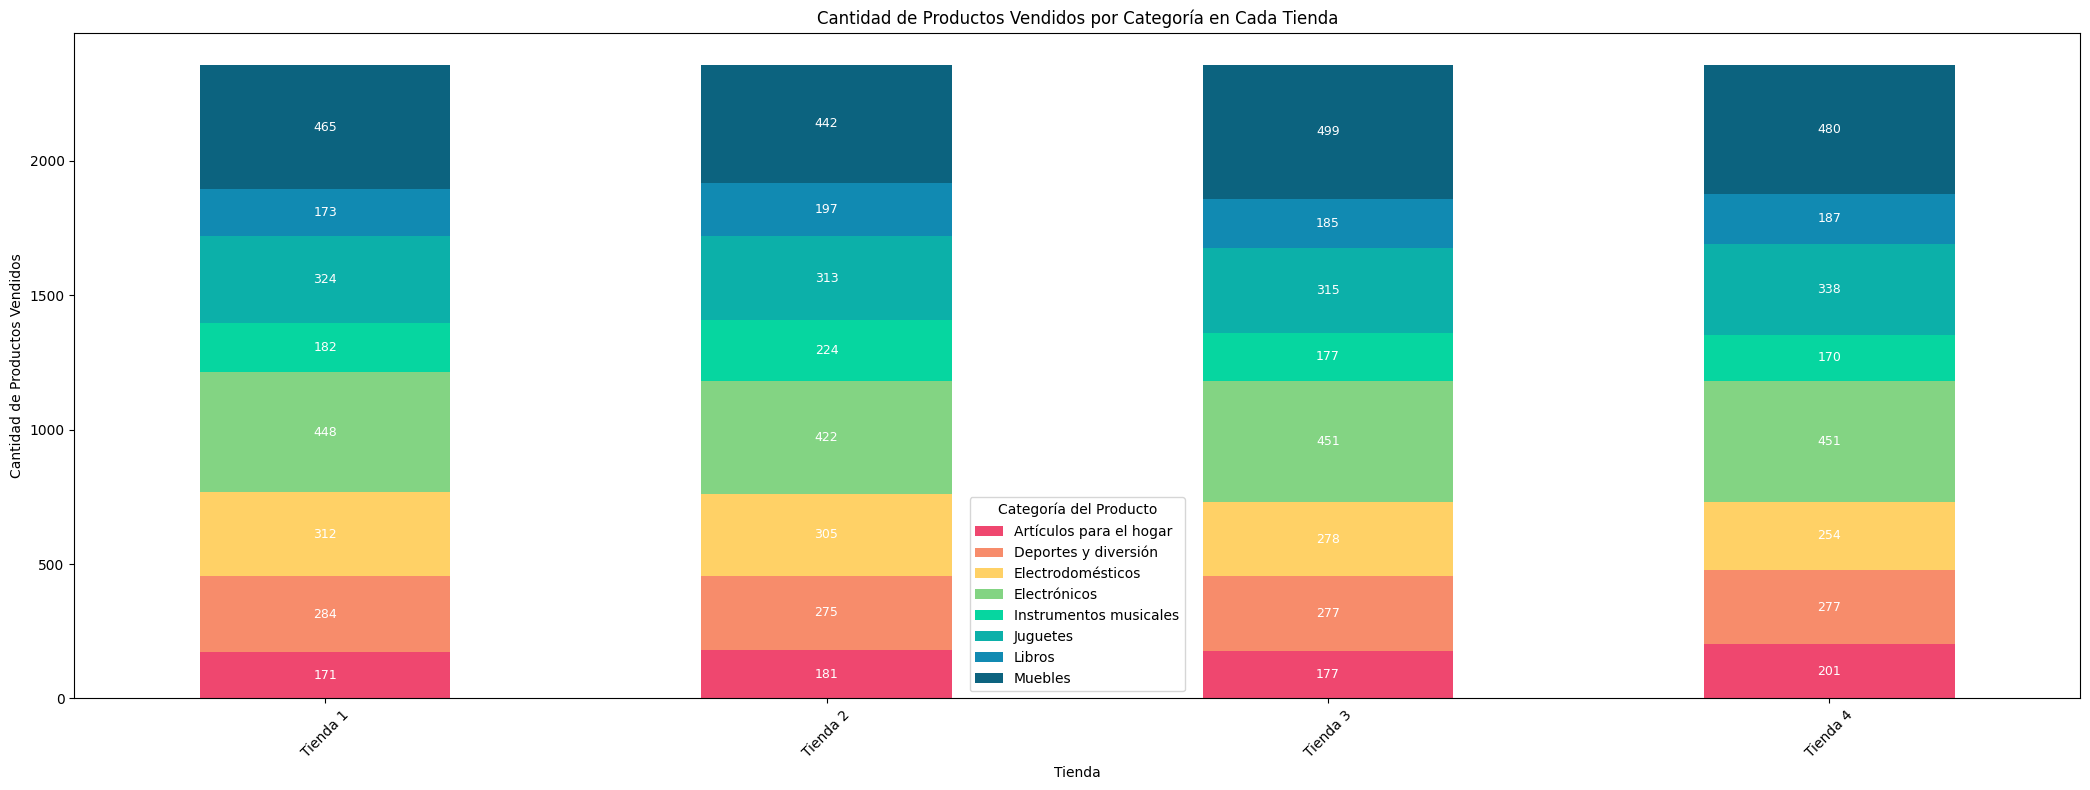


**Gráfico de Pastel (Ejemplo con Tienda 1)**

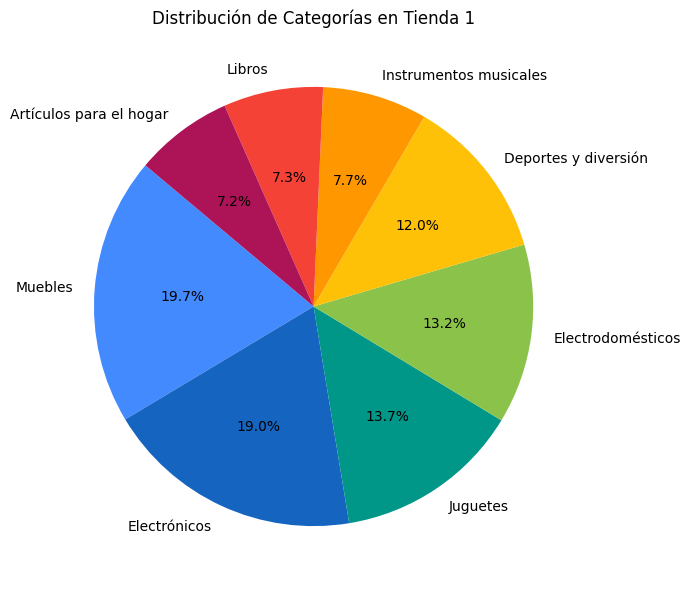
---

#### **3. Calificación Promedio de los Clientes**

La satisfacción del cliente es crucial para la lealtad y el éxito a largo plazo. Las **Tiendas 2 y 3** lideran con las calificaciones promedio más altas, lo que sugiere una excelente experiencia del cliente. Por el contrario, la **Tienda 1** y la **Tienda 4** tienen las calificaciones más bajas.

- **Tienda 2:** 4.04
    
- **Tienda 3:** 4.05
    
- **Tienda 1:** 3.98
    
- **Tienda 4:** 4.00
    

Aunque la diferencia es mínima, una calificación más baja en la Tienda 4, combinada con sus menores ingresos, apunta a un rendimiento general inferior.

**Gráfico - Satisfacción Promedio de Clientes por Tienda** _El uso de colores para diferenciar las calificaciones (rojo para las más bajas) y una línea de promedio general ayuda a contextualizar el rendimiento de cada tienda rápidamente._  


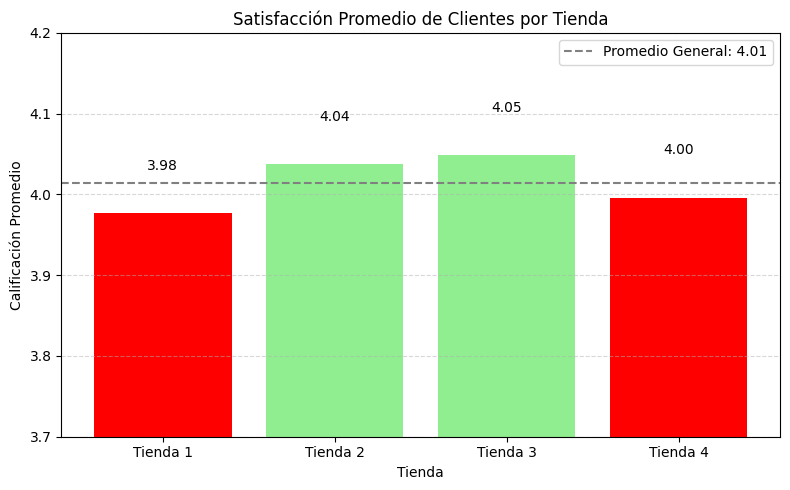

---

#### **4. Productos Más y Menos Vendidos**

Este análisis revela qué artículos específicos impulsan las ventas y cuáles no.

- **Productos más vendidos:** Cada tienda tiene productos estrella que se venden bien. Por ejemplo, en la Tienda 2, "Iniciando en programación" es un éxito de ventas con 65 unidades, el más alto entre los productos top. La Tienda 4 tiene un buen desempeño con "Cama box" (62 unidades).
    
- **Productos menos vendidos:** La Tienda 2 tiene el producto con la menor cantidad de ventas ("Juego de mesa" con 32 unidades). Sin embargo, esto es un dato aislado. En general, todas las tiendas tienen productos con ventas en un rango similar de 33-35 unidades.
    

Este indicador no señala a una tienda como deficiente, pero sí muestra que el éxito de productos individuales varía significativamente por sucursal.



**Gráficos - Top 10 productos más/menos vendidos:** _Los gráficos de barras horizontales para cada tienda son muy efectivos. Presentan la información de manera clara y separada, permitiendo un análisis detallado por sucursal._  

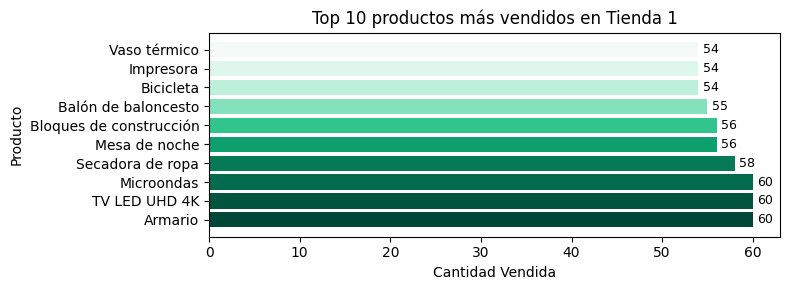


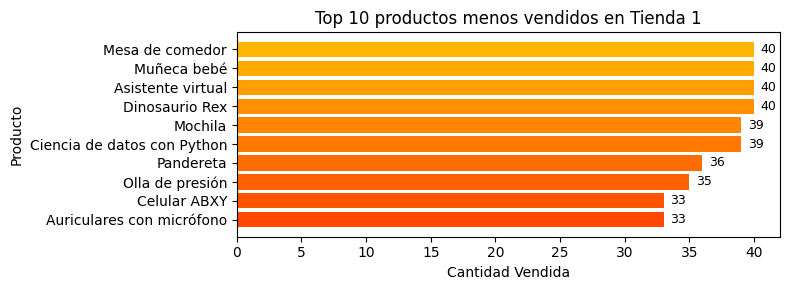


**Gráficos - Top 50 productos más/menos vendidos:** _Los gráficos de distribución horizontales para cada tienda presentan la información de manera clara._


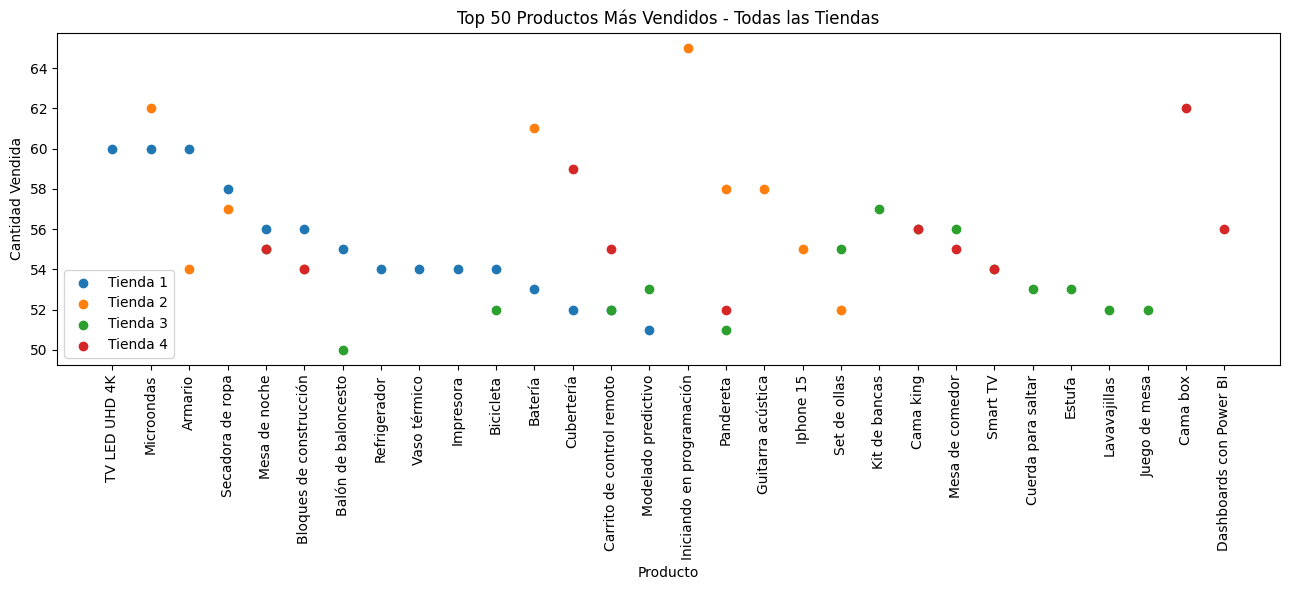  


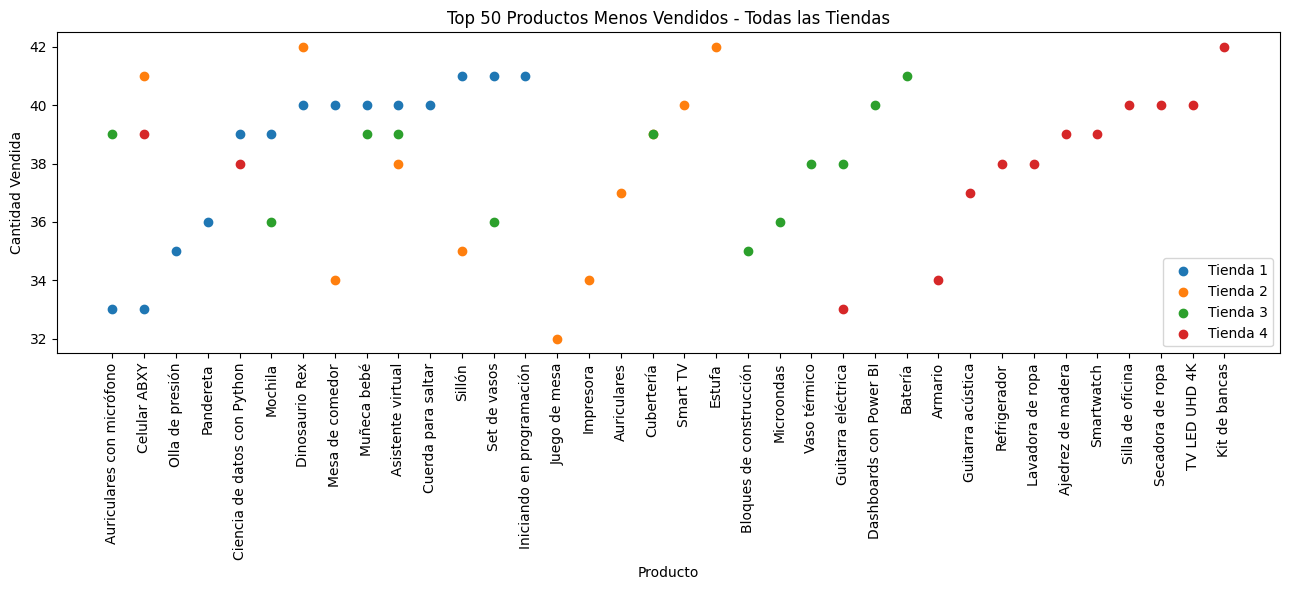

#### **5. Costo de Envío Promedio**

El costo de envío puede influir en la decisión de compra de los clientes. En este aspecto, la **Tienda 4** tiene una ventaja competitiva, ya que presenta el **costo de envío promedio más bajo**. Por el contrario, la **Tienda 1**, a pesar de ser la de mayores ingresos, tiene el costo de envío más elevado.

- **Tienda 1:** $26,018
    
- **Tienda 2:** $25,216
    
- **Tienda 3:** $24,805
    
- **Tienda 4:** $23,459
    

Aunque un costo de envío bajo es positivo, no ha sido suficiente para impulsar las ventas de la Tienda 4 por encima de las demás.

**Gráfico - Costo de Envío Promedio por Tienda:** _El gráfico de barras facilita la comparación directa a la proporción de costos._  


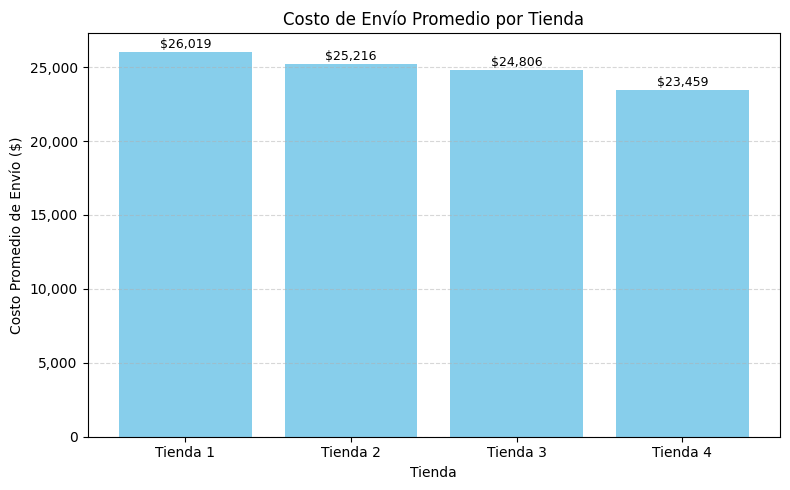

**Gráfico - Pastel:** _Distribucion de los costos de envio promedio por tienda_


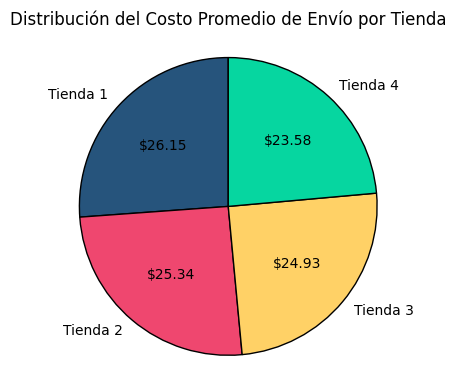

### **Conclusión y Recomendación Final**

Tras un análisis exhaustivo de los indicadores de rendimiento de las cuatro sucursales de Alura Store, la recomendación es **vender la Tienda 4**.

#### **Justificación de la Recomendación**

La decisión se debido de varios factores clave que posicionan a la Tienda 4 como la menos eficiente y con el menor potencial de crecimiento de las tiendas:

1. **Ingresos Totales Insuficientes:** Este es el factor más determinante. La Tienda 4 genera los **ingresos más bajos** de todas las tiendas, con una diferencia de más de $60$ millones respecto a su competidora más cercana (Tienda 3) y más de $112$ millones en comparación con la tienda líder (Tienda 1). Esta brecha financiera la convierte en la más débil.
    
2. **Baja Satisfacción del Cliente:** A pesar de que las diferencias son sutiles, su calificación promedio se encuentra en el extremo inferior junto con la Tienda 1. Una combinación de bajos ingresos y baja satisfacción del cliente es una señal de alerta importante.
    
3. **Rendimiento Débil en Categorías Clave:** Si bien destaca en la venta de Juguetes, su rendimiento en la categoría de **Electrodomésticos**, una de las más importantes, es el más bajo de todas las tiendas.
    

Aunque la Tienda 4 presenta el **costo de envío promedio más bajo**, esta ventaja no se ha traducido en un mayor volumen de ventas ni en ingresos superiores. Las otras tiendas, demuestran ser más valiosas:

- **Tienda 1:** A pesar de sus altos costos de envío y una calificación mejorable, es la **fuente de ingresos más grande** y, por lo tanto, fundamental para la estabilidad de la cadena.
    
- **Tiendas 2 y 3:** Son modelos de eficiencia equilibrada. Mantienen ingresos sólidos y, crucialmente, gozan de la **mayor satisfacción del cliente**, lo que las convierte en tiendas estables y fiables a largo plazo.
    

En resumen, la venta de la Tienda 4 es la decisión más lógica y estratégica, ya que permitiría al Sr. Juan deshacerse de la tienda con menor rendimiento para invertir en un nuevo proyecto con mayor potencial de éxito.

#### **6. Extra: Análisis del Desempeño Geográfico**

Para complementar el análisis, se realizó un estudio geográfico utilizando las coordenadas de compra. Este análisis explora cómo la ubicación impacta el volumen de ventas y el rendimiento general, utilizando herramientas de visualización como mapas de calor (`folium`) y gráficos de dispersión (`matplotlib`).

##### **Análisis de la Concentración de Ventas y Rendimiento**

El objetivo de este análisis es identificar patrones geográficos en los datos de ventas para entender si el rendimiento de una tienda está fuertemente ligado a su ubicación.

1. **Concentración Geográfica de Ventas:** El mapa de calor generado con los datos de todas las tiendas revela una fuerte concentración de las ventas en áreas geográficas específicas.
**Gráfico - mapa de calor interactivo generado con Folium:** _Este mapa muestra las "zonas calientes" de ventas para todas la tiendas de Alura Store._

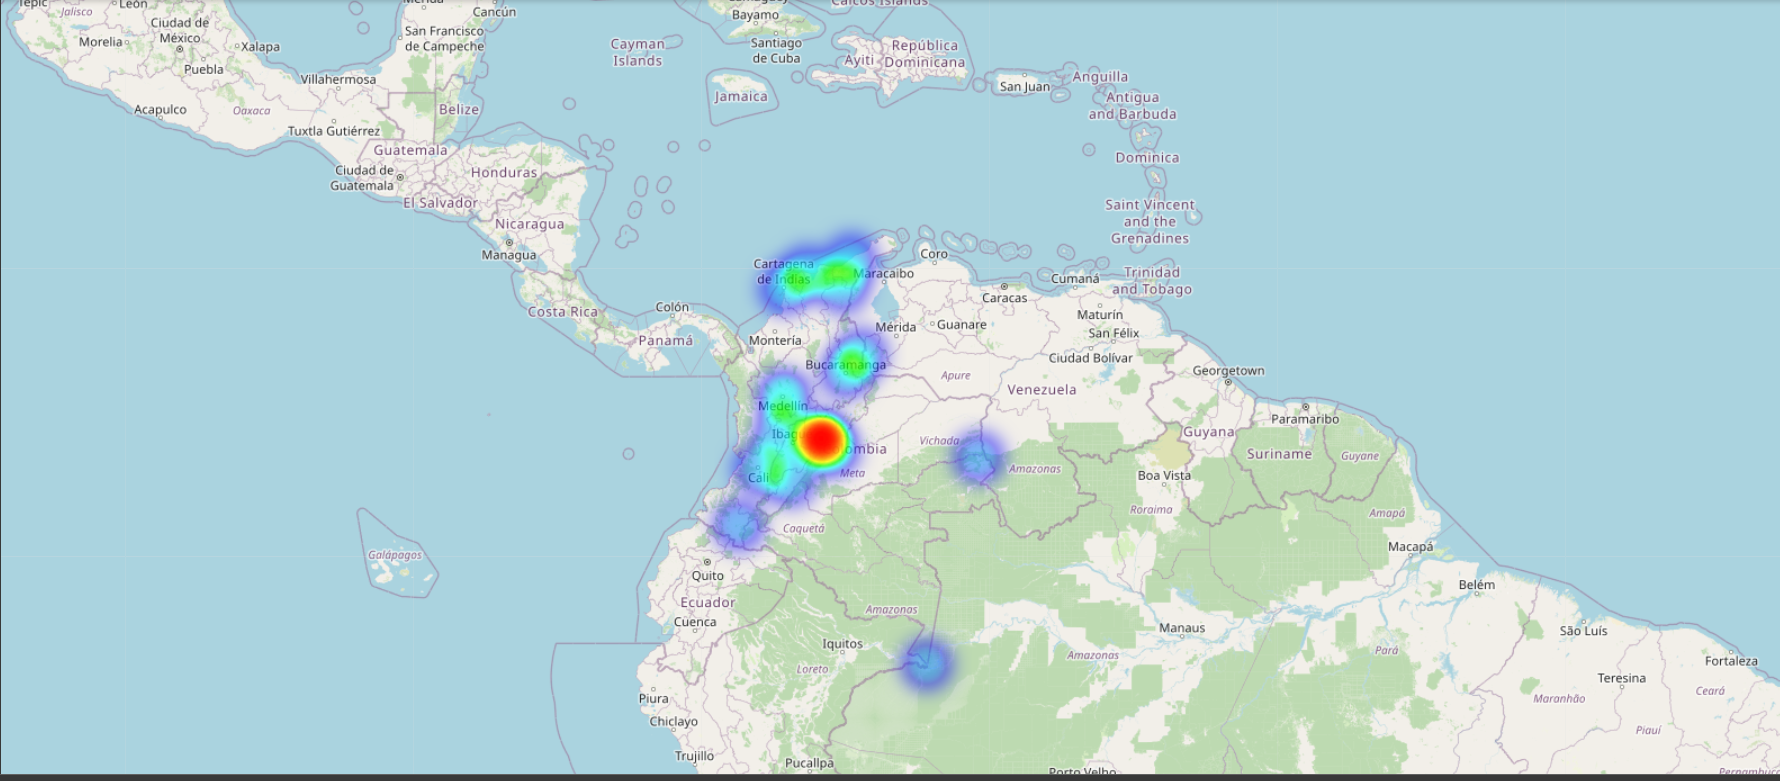

    
2. **Observaciones Clave por Ubicación:** El análisis de ventas por ciudad confirma lo que el mapa de calor sugiere:
    
    - **Ciudades Grandes:** **Bogotá** y **Medellín** son, con diferencia, las ciudades con el mayor volumen de ventas para todas las tiendas. Esto es esperable, dada su alta densidad de población y actividad económica.
        
    - **Rendimiento en Ciudades Pequeñas:** Ubicaciones como Armenia, Cúcuta, Leticia y Pasto muestran un volumen de ventas considerablemente inferior en comparación con las grandes capitales.
        
3. **Patrones y Factores Geográficos:**
    
    - **Urbano vs. Rural/Remoto:** Existe una clara división en el rendimiento. Las tiendas (o más bien, las ventas en línea que se registran) en grandes ciudades como Bogotá, Medellín y Barranquilla superan ampliamente a las de ciudades más pequeñas o de difícil acceso como Leticia.
        
    - **Influencia del Tráfico y Acceso:** El alto tráfico de personas y la mayor accesibilidad en las grandes ciudades son factores que probablemente impulsan las ventas. Las áreas con menor demanda o con mayores desafíos logísticos presentan un rendimiento inferior.
        

**Gráficos:** _El gráfico de dispersión que relaciona ventas y ubicación (Gráfico 2) muestra cómo las ventas totales (`Precio`) se distribuyen geográficamente, reforzando la idea de que la longitud y latitud (es decir, la ciudad) son determinantes en el volumen de ventas._

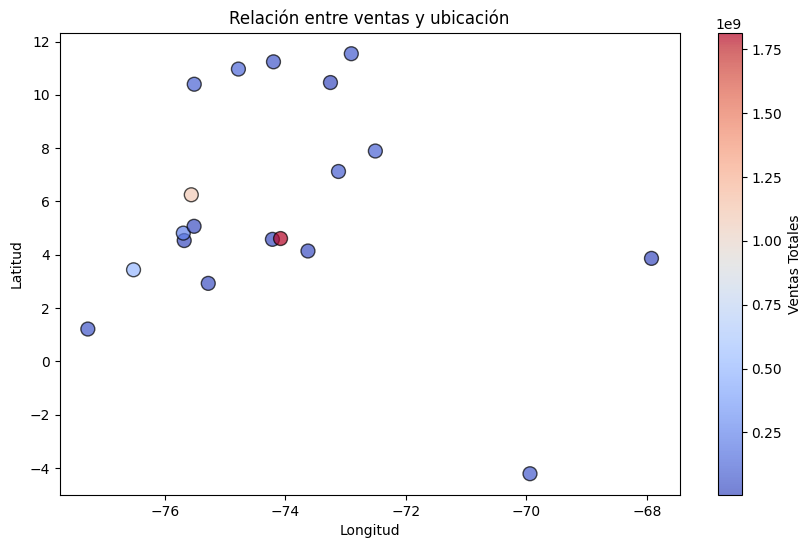

---


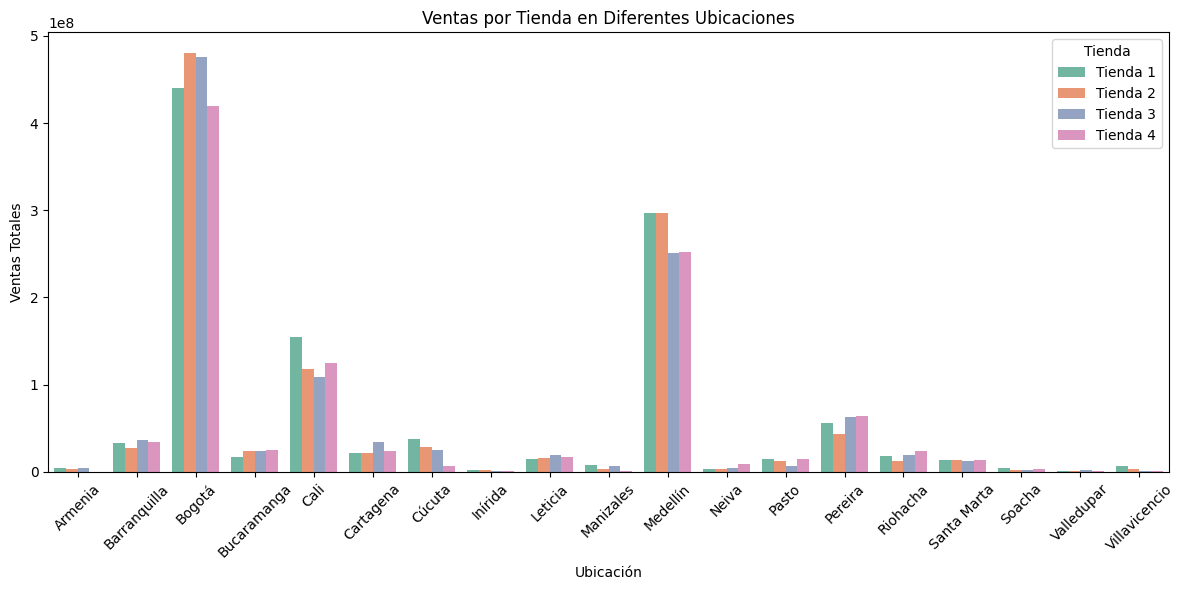

#### **Segunda Conclusión (Integrando el Análisis Geográfico)**

La recomendación inicial de **vender la Tienda 4** se mantiene y, de hecho, se ve **reforzada** por el análisis geográfico.

#### **Justificación segundo análisis**

El análisis geográfico demuestra que el éxito de las ventas de Alura Store está fuertemente correlacionado con la **ubicación**, grandes ciudades como Bogotá y Medellín son los principales ingresos de las tiendas. Todas las tiendas se benefician de estas ubicaciones de alto rendimiento y, a la inversa, todas muestran ventas más bajas en ciudades más pequeñas.

Esto es crucial por la siguiente razón: si el bajo rendimiento de la Tienda 4 se debiera a una mala estrategia de ubicación (por ejemplo, si solo operara en ciudades pequeñas), la recomendación podría ser reubicarla. Sin embargo, ya que todas las tiendas operan en las mismas ciudades, el problema de la Tienda 4 no es su ubicación, sino su **rendimiento**.

En otras palabras, la Tienda 4 tiene acceso a las grandes ciudades (Bogotá, Medellín) que las otras tiendas, pero **no logra obtener el máximo beneficio con la misma eficacia**. Sus **ingresos totales más bajos**, su **calificación de cliente inferior** y su **débil desempeño en categorías clave**, confirma que es la **Tienda** menos eficiente de la cadena.

Por lo tanto, la venta de la Tienda 4 sigue siendo la decisión más sólida. Vender la tienda de bajo rendimiento permitirá al Sr. Juan centrarse en las tiendas más fuertes y financiar nuevos proyectos con mayor probabilidad de éxito.

# Gracias

In [156]:
%cd /content/desafio-alura-store
!git add .
!git commit -m "Desarrollo Challenge Alura Store - Python para Data Science / ONE - G8"
!git push origin main


/content/desafio-alura-store
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
